# Liesel linear regression tutorial

In [7]:
import jax
import jax.numpy as jnp
import liesel.goose as gs
import liesel.model as lsl
import matplotlib.pyplot as plt
import numpy as np

# We use distributions and bijectors from tensorflow probability
import tensorflow_probability.substrates.jax.distributions as tfd
import tensorflow_probability.substrates.jax.bijectors as tfb

rng = np.random.default_rng(42)

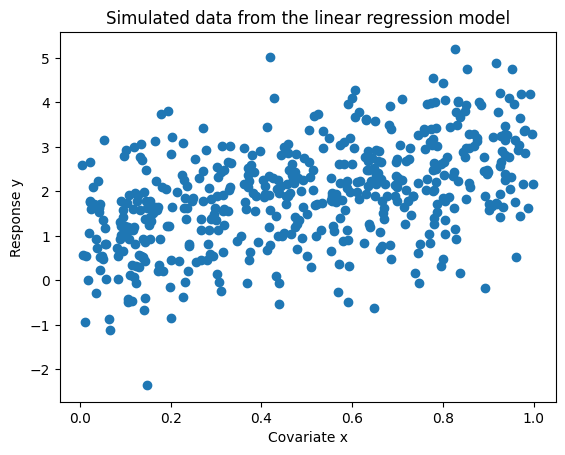

In [8]:
# sample size and true parameters

n = 500
true_beta = np.array([1.0, 2.0])
true_sigma = 1.0

# data-generating process

x0 = rng.uniform(size=n)
X_mat = np.column_stack([np.ones(n), x0])
eps = rng.normal(scale=true_sigma, size=n)
y_vec = X_mat @ true_beta + eps

# plot the simulated data

plt.scatter(x0, y_vec)
plt.title("Simulated data from the linear regression model")
plt.xlabel("Covariate x")
plt.ylabel("Response y")
plt.show()

In [9]:
beta_loc = lsl.Var(0.0, name="beta_loc")
beta_scale = lsl.Var(100.0, name="beta_scale") # scale = sqrt(100^2)

print(beta_loc)

Var(name="beta_loc")


In [10]:
print(beta_scale)

Var(name="beta_scale")


In [11]:
beta_dist = lsl.Dist(tfd.Normal, loc=beta_loc, scale=beta_scale)

In [12]:
beta = lsl.Param(value=np.array([0.0, 0.0]), distribution=beta_dist,name="beta")

In [13]:
sigma_a = lsl.Var(0.01, name="a")
sigma_b = lsl.Var(0.01, name="b")

sigma_dist = lsl.Dist(tfd.InverseGamma, concentration=sigma_a, scale=sigma_b)
sigma = lsl.Param(value=10.0, distribution=sigma_dist, name="sigma")

In [14]:
X = lsl.Obs(X_mat, name="X")


In [16]:
yhat_fn = lambda x, beta: jnp.dot(x, beta) # stick to JAX numpy functions in calculators
calc = lsl.Calc(yhat_fn, x=X, beta=beta)

In [17]:
y_hat = lsl.Var(calc, name="y_hat")

In [18]:
y_dist = lsl.Dist(tfd.Normal, loc=y_hat, scale=sigma)
y = lsl.Var(y_vec, distribution=y_dist, name="y")

In [19]:
gb = lsl.GraphBuilder().add(y)

liesel.model.model - INFO - Converted dtype of Data(name="y_value").value
liesel.model.model - INFO - Converted dtype of Data(name="beta_value").value
liesel.model.model - INFO - Converted dtype of Data(name="X_value").value


In [20]:
model = gb.build_model()

In [21]:
model

Model(24 nodes, 9 vars)

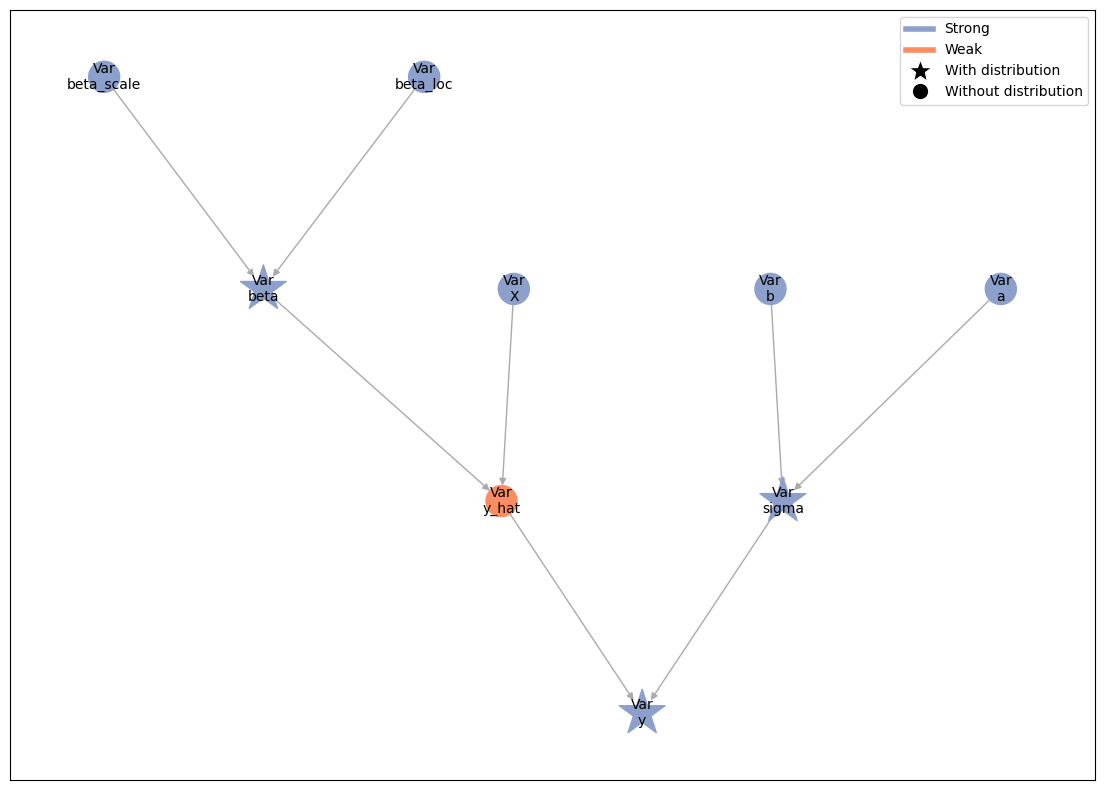

In [22]:
lsl.plot_vars(model)